In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan, normal_ad
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [28]:
df = pd.read_csv('cars_clean_clean')

In [29]:
selected_features = ['log_age', 
               'brand_Geely', 
               'is_restyling', 
               'color_group_Холодные', 
               'log_power_2', 
               'city_group_Москва', 
               'gearbox_механика', 
               'drive_полный',
               'car_class_Crossover']
numeric_feats = ['mileage', 'power_1', 'power_2', 'age']
cat_feats = ['brand', 'color_group', 'gearbox', 'drive', 'fuel_type', 'city_group', 'car_class']
dummies = ['is_restyling', 'is_pro', 'is_max', 'is_premium']
target = 'price'

In [30]:
def prepare_data(df, target_col, categorical_cols, numeric_cols=None, dummies=None):
    """Подготовка данных с обработкой категориальных и числовых признаков"""
    # Создание dummy-переменных
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded = encoder.fit_transform(df[categorical_cols])
    encoded_df = pd.DataFrame(encoded, 
                            columns=encoder.get_feature_names_out(categorical_cols))
    
    # Обработка числовых признаков
    if numeric_cols is None:
        numeric_cols = df.drop(columns=[target_col] + categorical_cols).columns
    
    X_numeric = df[numeric_cols].copy()
    X_dum = df[dummies].copy()
    
    # Создание преобразованных признаков
    X_transformed = pd.DataFrame()
    for col in numeric_cols:
        X_transformed[f'log_{col}'] = np.log1p(X_numeric[col])
        X_transformed[f'sq_{col}'] = X_numeric[col]**2
    
    # Объединение всех признаков
    X = pd.concat([X_numeric, X_transformed, encoded_df, X_dum], axis=1)
    y = df[target_col]
    
    return X, y, np.log1p(y), encoder

In [31]:
# Подготовка данных
X_full, y, target_log, encoder = prepare_data(df, target, cat_feats, numeric_feats, dummies)

In [32]:
X_final = sm.add_constant(X_full[final_featues])
model_linear_final = sm.OLS(target_log, X_final).fit()  
print(model_linear_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     1218.
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        11:32:54   Log-Likelihood:                 355.17
No. Observations:                1315   AIC:                            -690.3
Df Residuals:                    1305   BIC:                            -638.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.3904 

In [43]:
# Кастомная палитра на основе PiYG_r
custom_palette = sns.color_palette([
    '#E83D84', '#FF8FAB', '#FFB3C6',  # Розовые оттенки
    '#F5F5F5',                       # Нейтральный
    '#C8E6C9', '#A5D6A7', '#81C784'  # Мятные оттенки
])

In [48]:
color_scheme = custom_palette

# Оценка модели

In [46]:
X_full = sm.add_constant(X_full)
X_full

,const,mileage,power_1,power_2,age,log_mileage,sq_mileage,log_power_1,sq_power_1,log_power_2,...,car_class_Crossover,car_class_Luxury SUV,car_class_Other,car_class_SUV,car_class_Sedan,is_restyling,is_pro,is_max,is_premium,Quantile Group
0,1.0,12000.0,1.5,177.0,1.0,9.392745,1.440000e+08,0.916291,2.25,5.181784,...,0.0,0.0,0.0,1.0,0.0,0,0,0,0,75%
1,1.0,52460.0,1.5,113.0,1.0,10.867825,2.752052e+09,0.916291,2.25,4.736198,...,0.0,0.0,1.0,0.0,0.0,0,1,0,0,25%
2,1.0,6308.0,1.5,177.0,1.0,8.749732,3.979086e+07,0.916291,2.25,5.181784,...,0.0,0.0,0.0,1.0,0.0,0,0,0,0,75%
3,1.0,17169.0,2.0,200.0,2.0,9.750919,2.947746e+08,1.098612,4.00,5.303305,...,0.0,0.0,1.0,0.0,0.0,1,0,0,0,75%
4,1.0,22000.0,1.5,147.0,3.0,9.998843,4.840000e+08,0.916291,2.25,4.997212,...,0.0,0.0,1.0,0.0,0.0,1,0,0,0,25%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,1.0,10.0,2.0,238.0,0.0,2.397895,1.000000e+02,1.098612,4.00,5.476464,...,1.0,0.0,0.0,0.0,0.0,1,0,0,1,95%
1311,1.0,1.0,1.5,181.0,1.0,0.693147,1.000000e+00,0.916291,2.25,5.204007,...,0.0,0.0,1.0,0.0,0.0,0,0,0,0,75%
1312,1.0,10.0,1.5,181.0,1.0,2.397895,1.000000e+02,0.916291,2.25,5.204007,...,0.0,0.0,1.0,0.0,0.0,0,0,0,0,75%
1313,1.0,58000.0,1.5,177.0,3.0,10.968216,3.364000e+09,0.916291,2.25,5.181784,...,0.0,0.0,0.0,1.0,0.0,0,1,0,0,50%


In [55]:
quantile_levels = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]
regression_results = {}
coef_data = pd.DataFrame(index=X_full[selected_features].columns)
coef_data 

""
log_age
brand_Geely
is_restyling
color_group_Холодные
log_power_2
city_group_Москва
gearbox_механика
drive_полный
car_class_Crossover


In [75]:
# Анализ влияния переменных на разных квантилях
for level in quantile_levels:
    qr_model = sm.QuantReg(target_log, X_full[['const'] + selected_features])
    fitted_model = qr_model.fit(q=level, max_iter=1e5)
    regression_results[level] = fitted_model
    coef_data[level] = fitted_model.params

coef_data

,0.05,0.10,0.25,0.50,0.75,0.90,0.95
log_age,-0.359301,-0.357044,-0.361785,-0.365017,-2.026793e-01,-0.150045,-0.106419
brand_Geely,0.122861,0.057921,0.026449,0.019340,9.527840e-03,0.001141,-0.025426
is_restyling,0.205690,0.151082,0.059768,0.045722,5.971711e-05,0.040225,0.071853
color_group_Холодные,0.000004,0.127833,0.174941,0.045724,7.938054e-07,0.016562,0.197297
log_power_2,0.932761,0.840714,0.628430,0.671309,8.393003e-01,0.804946,0.694268
city_group_Москва,0.060710,0.018849,0.049046,0.070950,5.990846e-02,0.001532,0.043584
gearbox_механика,-0.636959,-0.515652,-0.612833,-0.842980,-1.047702e+00,-1.119876,-0.906127
drive_полный,0.092716,-0.003634,0.016331,0.023268,7.187833e-02,0.016913,0.069955
car_class_Crossover,-0.203868,-0.022656,0.134527,-0.099440,-3.563226e-02,0.008450,-0.046065


In [81]:
fitted_model.params

const                   11.251394
log_age                 -0.106419
brand_Geely             -0.025426
is_restyling             0.071853
color_group_Холодные     0.197297
log_power_2              0.694268
city_group_Москва        0.043584
gearbox_механика        -0.906127
drive_полный             0.069955
car_class_Crossover     -0.046065
dtype: float64

In [77]:
fitted_model.conf_int().iloc[1:]

,0,1
log_age,-0.130287,-0.082552
brand_Geely,-0.051137,0.000286
is_restyling,0.046017,0.097689
color_group_Холодные,0.173333,0.221261
log_power_2,0.622502,0.766034
city_group_Москва,0.017214,0.069954
gearbox_механика,-0.939254,-0.873000
drive_полный,0.042330,0.097580
car_class_Crossover,-0.074085,-0.018045


In [80]:
# Подготовка данных для визуализации (доверительные интервалы)
confidence_ranges = {var: [] for var in selected_features}
for level in quantile_levels:
    ci_bounds = regression_results[level].conf_int().iloc[1:]
    for var in selected_features:
        var_pos = selected_features.index(var)
        confidence_ranges[var].append((
            level, 
            ci_bounds.iloc[var_pos, 0], 
            ci_bounds.iloc[var_pos, 1]
        ))

confidence_ranges

{'log_age': [(0.05, -0.3944618208334034, -0.32414053032568835),
  (0.1, -0.38732625794119124, -0.3267611210382656),
  (0.25, -0.39152946093331153, -0.33204073344241336),
  (0.5, -0.38295418922031355, -0.34707927512111814),
  (0.75, -0.21685018397648828, -0.18850835700003363),
  (0.9, -0.16928789956042384, -0.1308019176818001),
  (0.95, -0.13028672414118453, -0.08255189298863436)],
 'brand_Geely': [(0.05, 0.09759848179537736, 0.1481227418423244),
  (0.1, 0.031980353398081925, 0.08386113542148743),
  (0.25, -0.002073663753095544, 0.05497087569188004),
  (0.5, 0.000670038070501762, 0.03800972092624826),
  (0.75, -0.004927170172481704, 0.023982850966308172),
  (0.9, -0.015161899096078173, 0.017444855887951576),
  (0.95, -0.05113735382965033, 0.000285804616756747)],
 'is_restyling': [(0.05, 0.1864976078006997, 0.22488206414047693),
  (0.1, 0.12890540112884358, 0.17325811348537806),
  (0.25, 0.03554647840008199, 0.08399033315253876),
  (0.5, 0.028901902174396404, 0.06254308722682862),
  (0.7

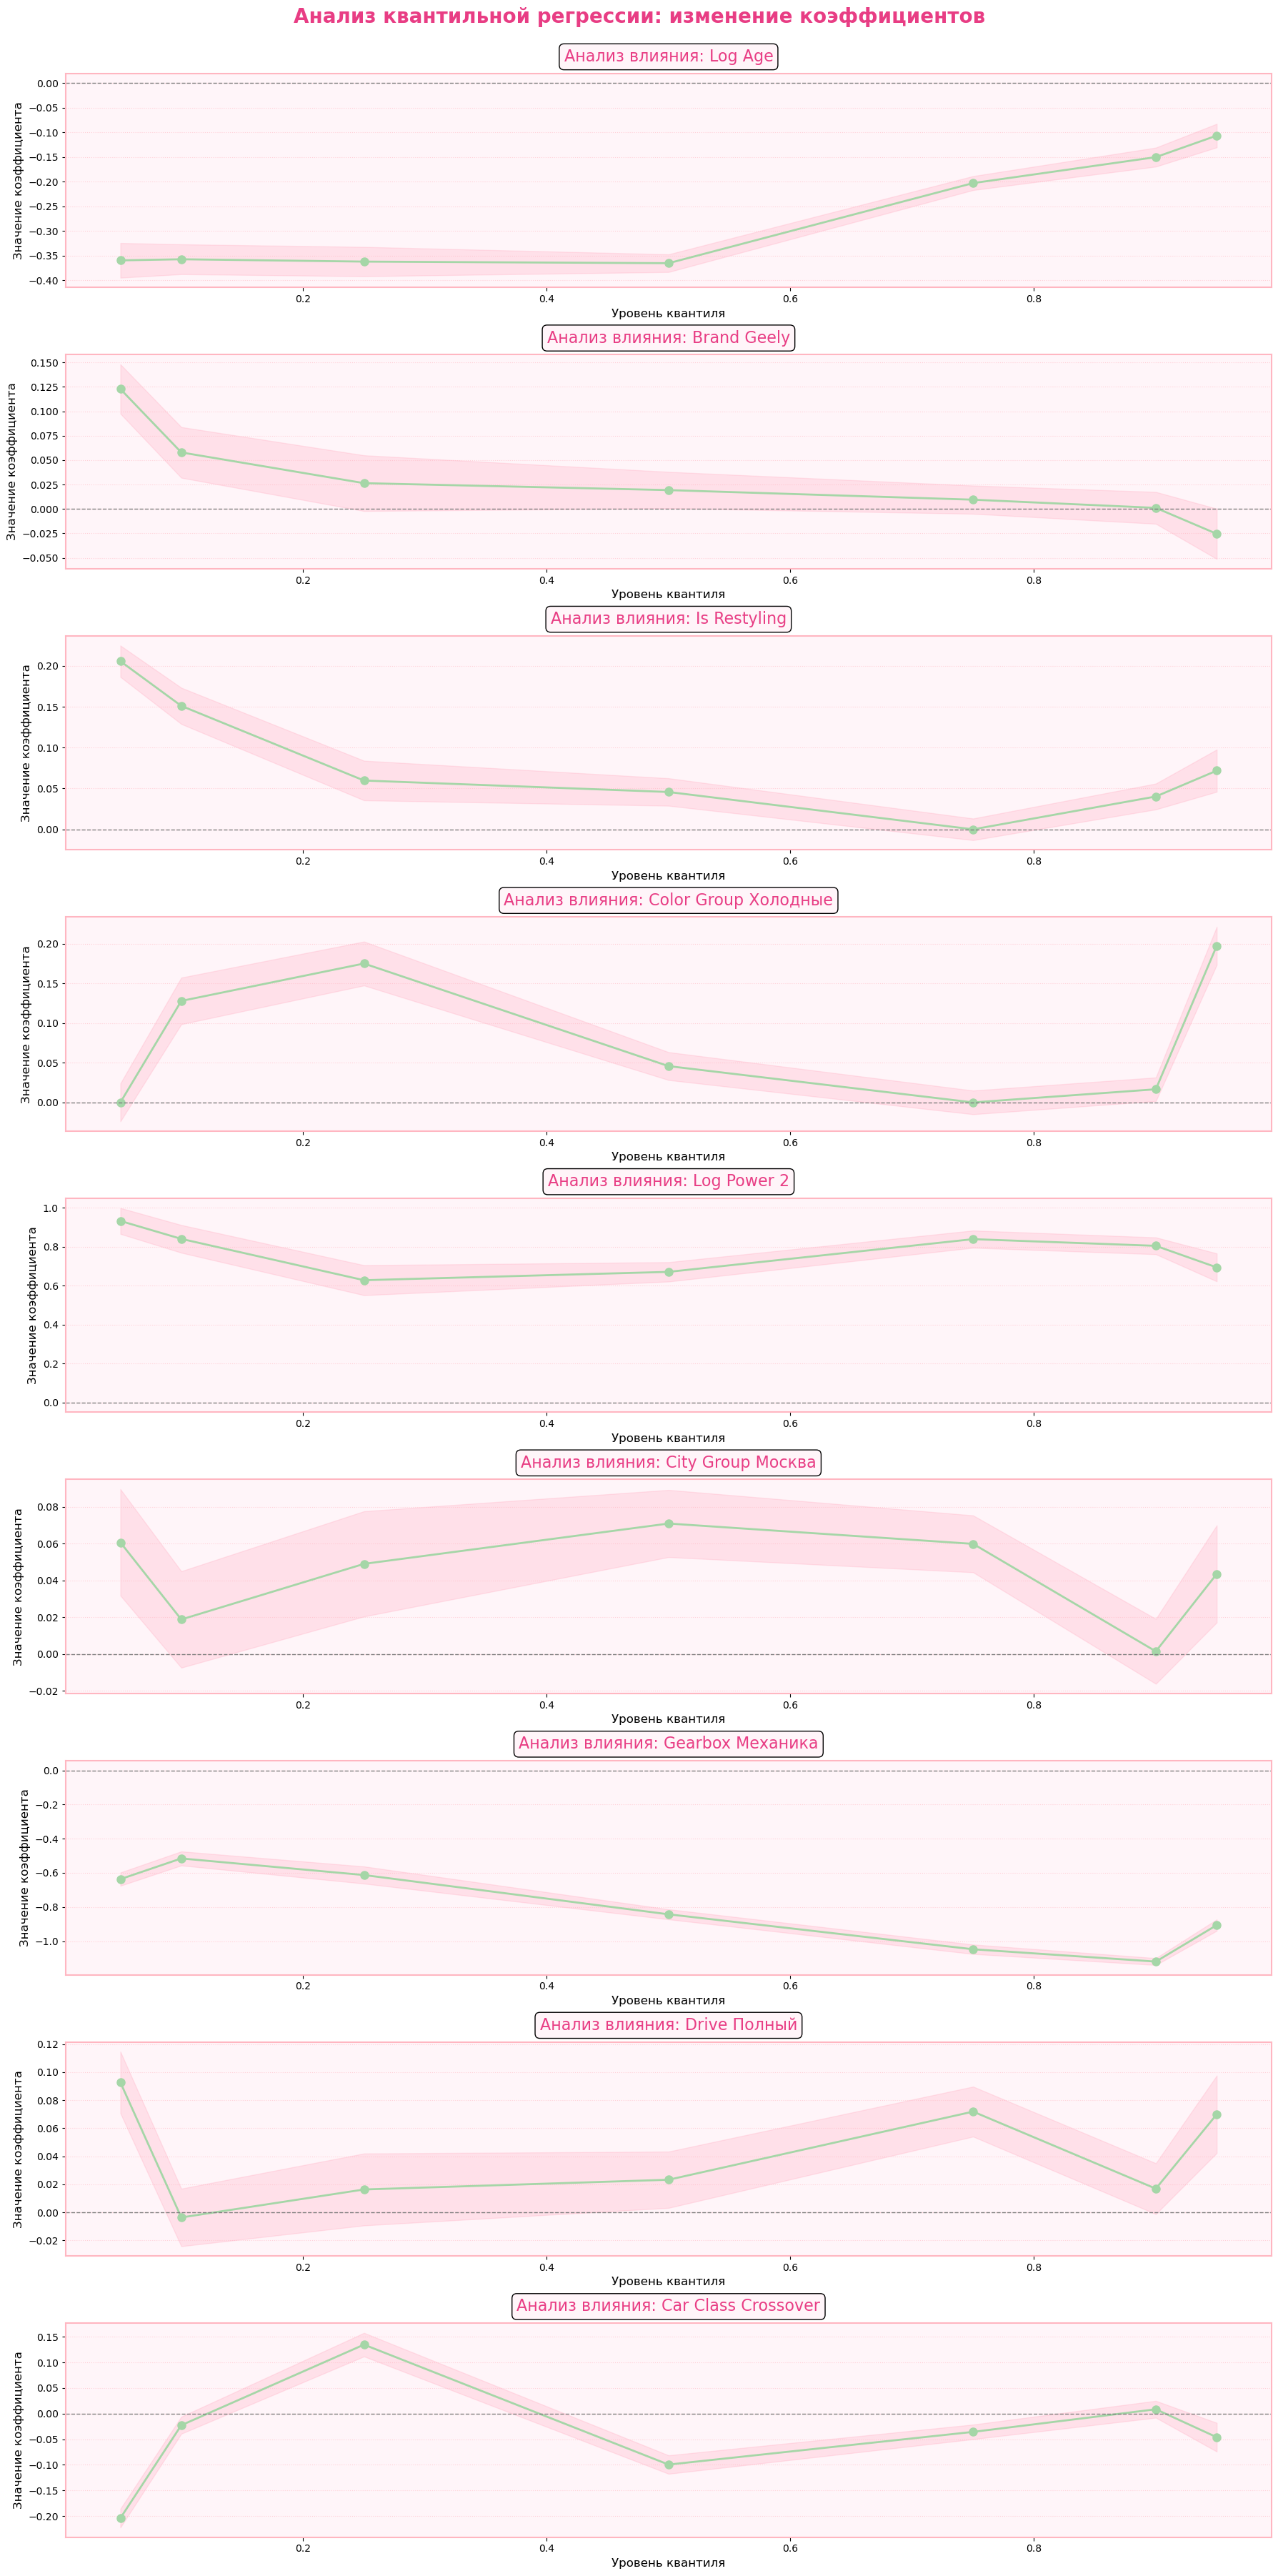

In [79]:
# Визуализация результатов
plot_settings = {
    'figure_size': (18, len(selected_features) * 4),
    'fill_alpha': 0.2,
    'line_style': '-',
    'marker_style': 'o',
    'title_padding': 12,
    'grid_style': ':',
    'face_color': '#FFF5F9'
}

plt.figure(figsize=plot_settings['figure_size'])

for i, variable in enumerate(selected_features, 1):
    ax = plt.subplot(len(selected_features), 1, i)
    
    ci_df = pd.DataFrame(
        confidence_ranges[variable], 
        columns=['quantile', 'ci_low', 'ci_high']
    )
    
    # Визуализация доверительного интервала
    ax.fill_between(
        ci_df['quantile'], 
        ci_df['ci_low'], 
        ci_df['ci_high'],
        alpha=plot_settings['fill_alpha'], 
        color=color_scheme[1]
    )
    
    # Линия коэффициентов
    ax.plot(
        ci_df['quantile'], 
        coef_data.loc[variable],
        marker=plot_settings['marker_style'],
        linestyle=plot_settings['line_style'],
        color=color_scheme[5],
        markersize=8,
        linewidth=2
    )
    
    ax.set_title(
        f'Анализ влияния: {variable.replace("_", " ").title()}',
        fontsize=16,
        pad=plot_settings['title_padding'],
        color=color_scheme[0],
        bbox={'facecolor': plot_settings['face_color'], 'boxstyle': 'round'}
    )
    
    ax.grid(
        axis='y', 
        linestyle=plot_settings['grid_style'], 
        color='#FFB6C1', 
        alpha=0.6
    )

    ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)
    
    for spine in ax.spines.values():
        spine.set_color('#FFB6C1')
        spine.set_linewidth(1.5)
    
    ax.set_facecolor(plot_settings['face_color'])
    ax.set_xlabel('Уровень квантиля', fontsize=12)
    ax.set_ylabel('Значение коэффициента', fontsize=12)

plt.suptitle(
    'Анализ квантильной регрессии: изменение коэффициентов',
    fontsize=20,
    y=1,
    color=color_scheme[0],
    fontweight='bold'
)

plt.tight_layout()
plt.savefig('quantile_analysis_results.png', dpi=300, bbox_inches='tight')
plt.show()